# Group 87 Final report - Predicting Reason for Absence at Work

## Introduction

Background Information

Absenteeism refers to the habitual non-presence of an employee at their job. Absence turns into absenteeism when an employee is absent from work for lengths beyond what is considered an acceptable time span. People miss work for various reasons such as health issues, familial commitments, etc.

Employee absenteeism becomes a problem for companies as it can result in lowered productivity, increased costs, and employee burnout. If an employee is regularly absent, they contribute less to the company leading to decreased productivity. However, the company is still bearing the cost of hiring this employee, who is often eligible for paid leaves. The work that the absent employee misses has to be done by another employee, which can lead to employee burnout for the latter. 

It is because of these effects that it becomes important to study absenteeism and find solutions for the same.

Dataset Information

The dataset “Absenteeism at Work” was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. It was donated to the UCI Machine Learning Repository, which is our source for the dataset. The data consists of 740 rows and 21 columns. A total of 28 reasons for absences are documented, each represented by an integer from 1 to 28. A reason represented by 0 means “other reason”. We chose the top 10, most common reasons to be predicted since many reasons like death and blood donation are less common in the dataset.

In this project, we aim to predict the reason for absence using a classification model based on three predictors: age, BMI and absenteeism time in hours. We chose these three predictors after a lot of deliberation as they showed an interpretable correlation with the categories given in the dataset.

## Methods and Results 

We start by loading necessary packages.

## Loading the necessary libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Loading data

We then load the absenteeism dataset from the following url. We use make.names() to ensure column names are not separated by spaces, but by periods.

In [16]:
data <- read_csv2(url("https://raw.githubusercontent.com/tim13246879/dsci-100-2022w1-group-87/main/Absenteeism_at_work.csv"))
colnames(data) <- make.names(colnames(data))
data

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 740 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (20): ID, Reason for absence, Month of absence, Day of the week, Seasons...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239554,⋯,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239554,⋯,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4
14,19,7,2,1,155,12,14,34,239554,⋯,0,1,2,1,0,0,95,196,25,40


Table 1: Original absenteeism dataset. 

## Preliminary Data Analysis 

# Wrangling data

We start to wrangle the data by removing all 0s in the "reasons for absence" column of our original dataset, since we are not interested in predicting a reason that is unknown. As mentioned in the introduction, we then find the top 10 absent reasons using group_by() and summarize(). 

In [3]:
top_10_reasons <- data |>
    group_by(Reason.for.absence)|>
    summarize(frequency = n()) |>
    filter(Reason.for.absence != "0") |>
    arrange(desc(frequency)) |>
    slice(1:10)
top_10_reasons

Reason.for.absence,frequency
<dbl>,<int>
23,149
28,112
27,69
13,55
19,40
22,38
26,33
25,31
11,26


Table 2: Frequency of the top 10 reasons for absence 

Using information from table 2 above, we then filter out the top 10 reasons of absence from the original data set. This is to limit the scope of the algorithm. Since we only aim to predict the top 10 reasons, we only want these reasons in the data set. We also convert the Reason.for.absence column to a factor as each of the numbers represent a reason. Only the top 6 rows are presented as this table is similar to table 1. 

In [14]:
data <- data |> 
    filter(Reason.for.absence %in% c("23","28","27","13","19","22","26","25","11","10")) |>
    mutate(across(Reason.for.absence, as.factor))
head(data)

ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4


Table 3: First 6 rows of filtered absenteeism dataset 

This filtered dataset would be used for the rest of our data analysis. In this dataset, the reason of absence represented by 0 meaning “other reasons” are removed. Only the top 10 reasons are kept (23, 28, 27, 13, 19, 22, 26, 25, 11, and 10). The reason for absence column is mutated to factor. 

### Choosing potential predictors

To determine the best predictors for the classification model, we start by exploring potential predictors using intuition and results from scientific articles. These potential predictors are then further analyzed before we decide on final predictors for the algorithm. 

As we notice that the absent reasons are mostly related to medical conditions, we hypothesize that an employee's age, BMI, distance between their residence and work, as well as the time they are absent, can be predictors of their specifc medical condition (absent reason).

#### Age

Intuitively, older people are more vulnerable to diseases. This is also supported by scientific evidence (Bouville et al., 2018). Therefore, we can, for example, expect older employees to be absent due to medical consultations (reason 23), while younger employees may be absent from other reasons like blood donation.

#### BMI


(Zammit et al., 2010)


(mention that reasons are medical conditions)

# Visualizations to determine the potential predictors to predict reason for absence 

To find the optimal predictor(s) for the algorithm, we explore 4 potential predictors below (absenteeism time in hours, body mass index(BMI), age and distance from residence to work). See below for an explanation for the choice of these potential predictors. For each potential predictor, we find their mean, grouping by each reason. This information is then used to graph 4 bar charts (one for each potential predictor), with the reason of absence on the y-axis and the mean of potential predictor on the x-axis. These bar graphs will help us decide the best predictors for the algorithm. See more detail below. Note that since this is preliminary analysis of the data, we have not yet split the data into testing and training sets. The purpose of this section is purely to determine the predictors. Any data like means of potential predictors will not be used when building the algorithm. 

## Datatable and visualization for absenteeism time in hours, BMI, age and distance from residence to work

From the filtered dataset, we were interested in how the mean absenteeism time (hrs), mean BMI, mean age and mean distance from residence to work might relate to the top 10 reasons for absence. We took the average of these 4 potential predictors for each reason for absence and added a "reason" column in the datatable below to define each reason.

In [5]:
data_means <- data |> 
    group_by(Reason.for.absence)|>
    summarize(Mean.absent.hours = mean(Absenteeism.time.in.hours),
             Mean.BMI = mean(Body.mass.index),
             Mean.age = mean(Age),
             Mean.distance.from.residence.to.work = mean(Distance.from.Residence.to.Work))|>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_means

Reason.for.absence,Mean.absent.hours,Mean.BMI,Mean.age,Mean.distance.from.residence.to.work,Reason
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,11.040000,26.20000,35.96000,24.00000,Diseases of the respiratory system
11,11.423077,26.42308,35.11538,29.69231,Diseases of the digestive system
13,15.309091,26.63636,36.49091,29.52727,Diseases of the musculoskeletal system and connective tissue
19,18.225000,26.40000,35.45000,30.42500,"Injury, poisoning and certain other consequences of external causes"
22,7.710526,26.18421,32.65789,36.68421,patient follow-up
23,2.845638,26.65772,35.61074,27.94631,medical consultation
25,3.483871,25.09677,36.16129,22.67742,laboratory examination
26,7.272727,30.18182,37.84848,25.84848,unjustified absence
27,2.275362,27.46377,35.50725,36.98551,physiotherapy


Table 4: Means of potential predictors for top 10 absent reasons. 

Table 4 includes a "reason" column that describes each of the 10 reasons of absence. The means of the 4 potential predictors for each reason are recorded. 

 Then we used information from table 4 to plot a bar graph to show how the mean of the 4 potential predictors are different for each reason of absence. 

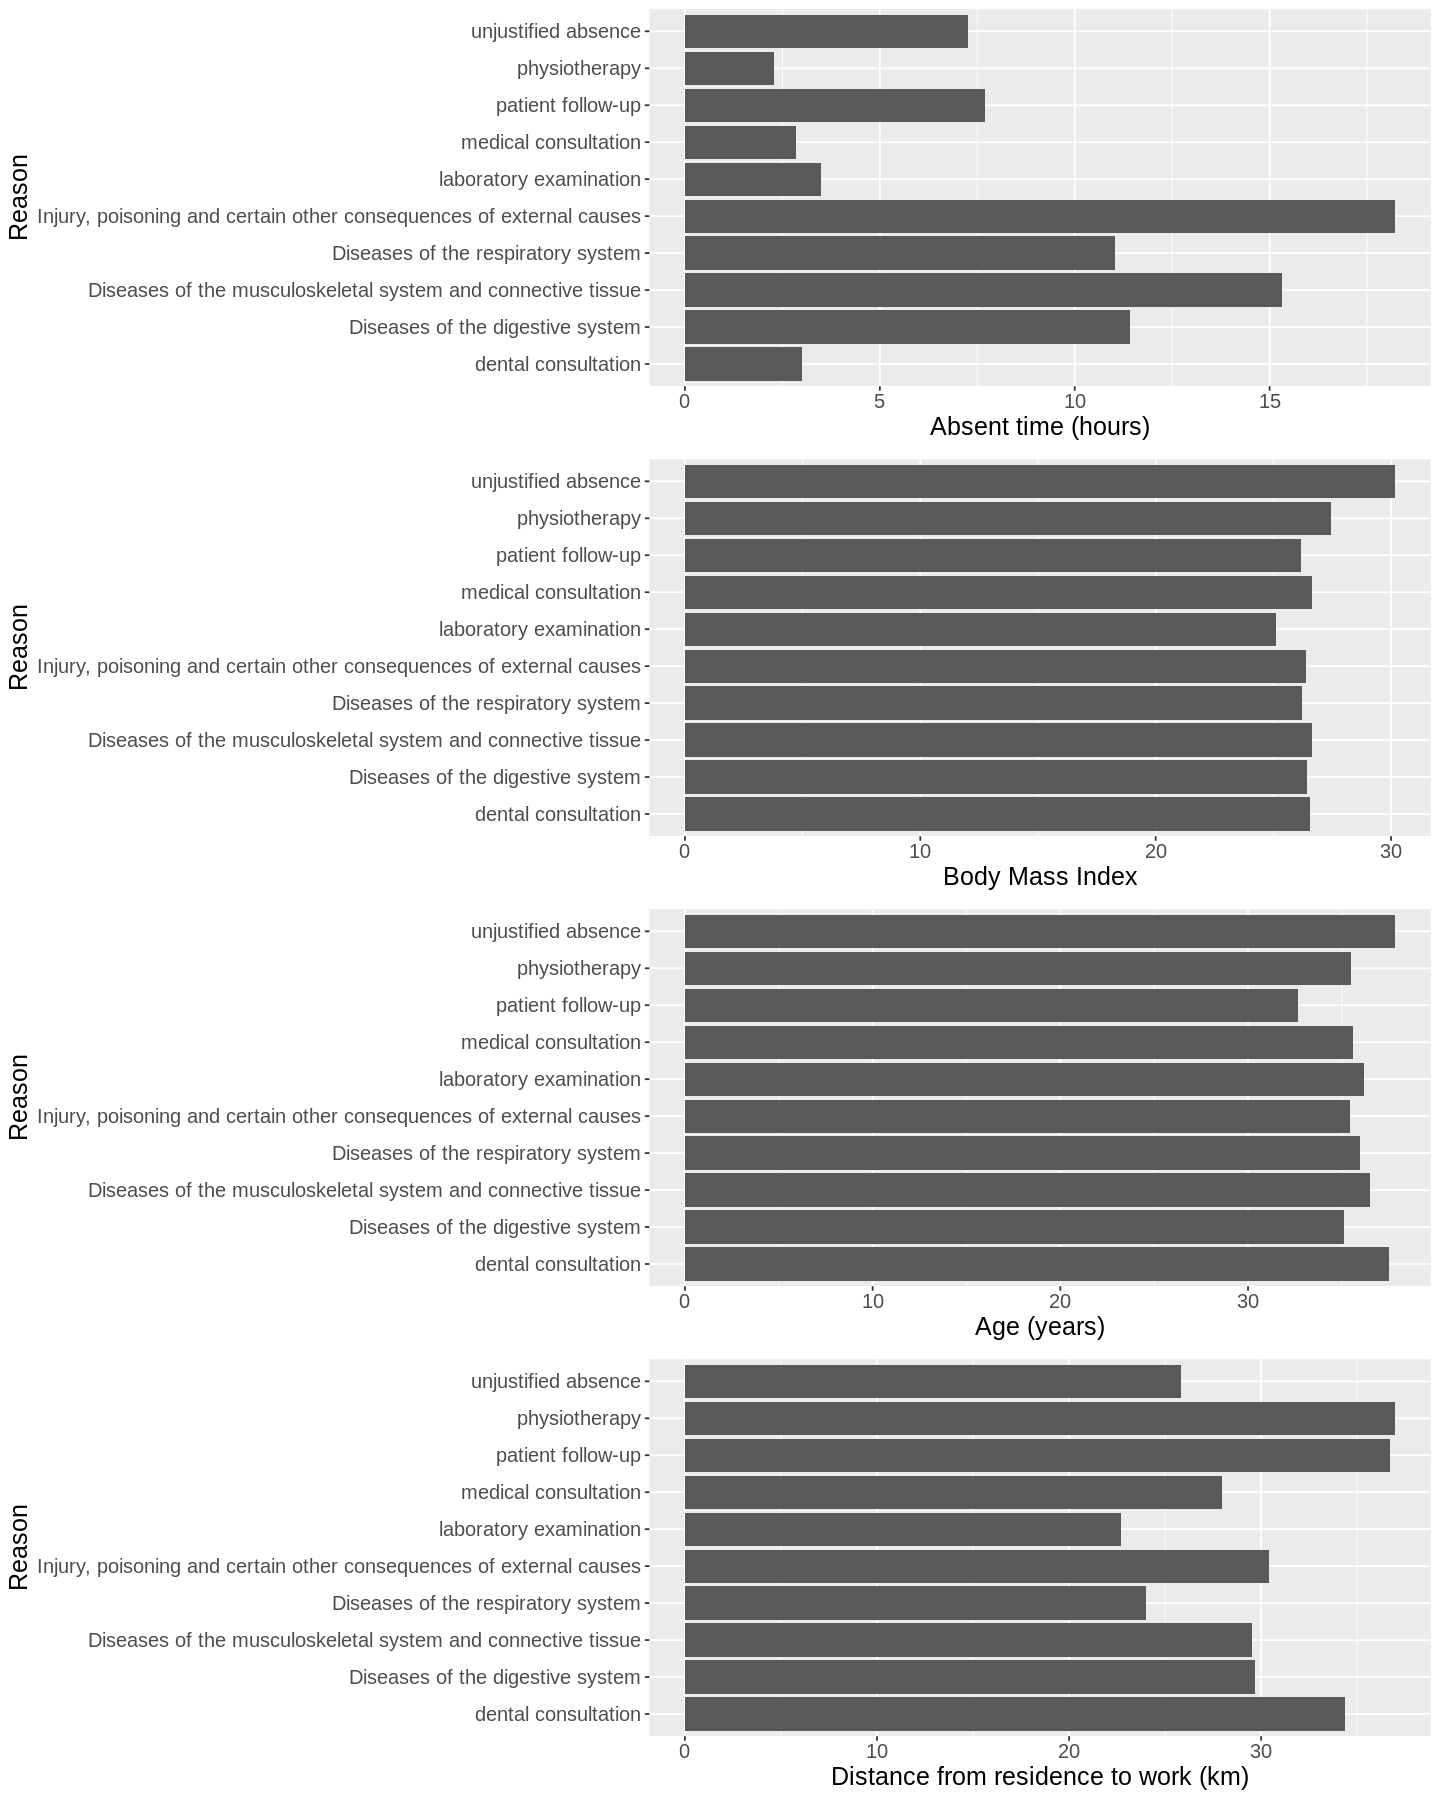

In [14]:
data_plot_time <- ggplot(data_means, aes(y = Reason, x = Mean.absent.hours)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Absent time (hours)") +
    theme(text = element_text(size = 15))

data_plot_BMI <- ggplot(data_means, aes(y = Reason, x = Mean.BMI)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Body Mass Index") +
    theme(text = element_text(size = 15))

data_plot_age <- ggplot(data_means, aes(y = Reason, x = Mean.age)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Age (years)") +
    theme(text = element_text(size = 15))

data_plot_distance <- ggplot(data_means, aes(y = Reason, x = Mean.distance.from.residence.to.work)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Distance from residence to work (km)") +
    theme(text = element_text(size = 15))

options(repr.plot.width = 12, repr.plot.height = 15)

plot_means <- plot_grid(data_plot_time, data_plot_BMI, data_plot_age, data_plot_distance, ncol = 1) 
plot_means

Figure 1: Bar graph of the top reasons for absence (y-axis) vs. each of the 4 potential predictors (x-axis)

From the bar graph (figure 1) above, we notice how the mean number of absent hours differs quite a lot for different reasons of absence. For example, “injury, poisoning and other consequences” has a mean absent hours of around 18 hours, while that of “dental consultation” is only 3 hours. This is reasonable as we would expect people who are hospitalized due to poisoning to be absent for longer times than those who are just going to the dentist. Thus, we conclude that the hours an employee is absent may be a good predictor of why they are absent.

From the bar graph above, it seems that mean body mass index of employees is similar for the different reasons of absence indicated by the same length of the bars. So probably BMI is a bad predictor.

From the bar graph above, there is no variation for each reason of absence throughout different ages. Specifically all employees who are age 30 are absent for these 10 reasons. So age might be a bad predictor.

From the bar graph above, the distances from residence to work are different for each reason of absence. For example, Employees who live a longer distance (> 30 km away) from residence to work are absent for work due to dental consultation, physiotherapy and patient followup. Employees who live less than 30 km away can be absent for work due to other reasons. So we thought this might be a good predictor.

To summarize, from figure 1, there is a possible correlation between the distances from residence to work or the number of hours absent, and the reason for absenteeism. Therefore, we would use the distances from residence to work and the number of hours absent as our two predictors for the remaining data analysis.

## Data analysis - Classification 

Since we were predicting a categorical variable (reason for absence), we would perform our data analysis using a classification model using  distances from residence to work and absenteeism time(hr) as our predictor variables. 

We set our seed to 1000. We splitted the dataset into 70% training set and 30% training set. 

In [7]:
set.seed(1000) 

data_split <- initial_split(data, prop = 0.7, strata = Reason.for.absence)  
data_train <- training(data_split)
data_test <- testing(data_split)

First we created a nearest_neighbors model specification, with neighbors = tune() and a recipe that uses all predictors. Then we performed a 5-fold cross validation using the vfold_cv function to split up the training data to find the most optimal k for our dataset. 

In [8]:
set.seed(1000)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_tune

data_recipe <- recipe(Reason.for.absence ~ Absenteeism.time.in.hours + Distance.from.Residence.to.Work, data = data_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

data_recipe

data_vfold <- vfold_cv(data_train, v = 5, strata = Reason.for.absence)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

We then added the recipe and model specification to a workflow, and used the tune_grid function on the train/validation splits to estimate the classifier accuracy for a range of K values from 1 to 50. Note that k_vals is chosen to be 1 to 50 so it is less computationally expensive. We also tried k_vals of 1 to 100, but it took way too long to process. 

In [9]:
set.seed(1000)
k_vals <- tibble(neighbors = seq(1:50))

knn_results <- workflow() |>
    add_recipe(data_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = data_vfold, grid = k_vals) |>
    collect_metrics()

We created a plot that compares the accuracies with different k.

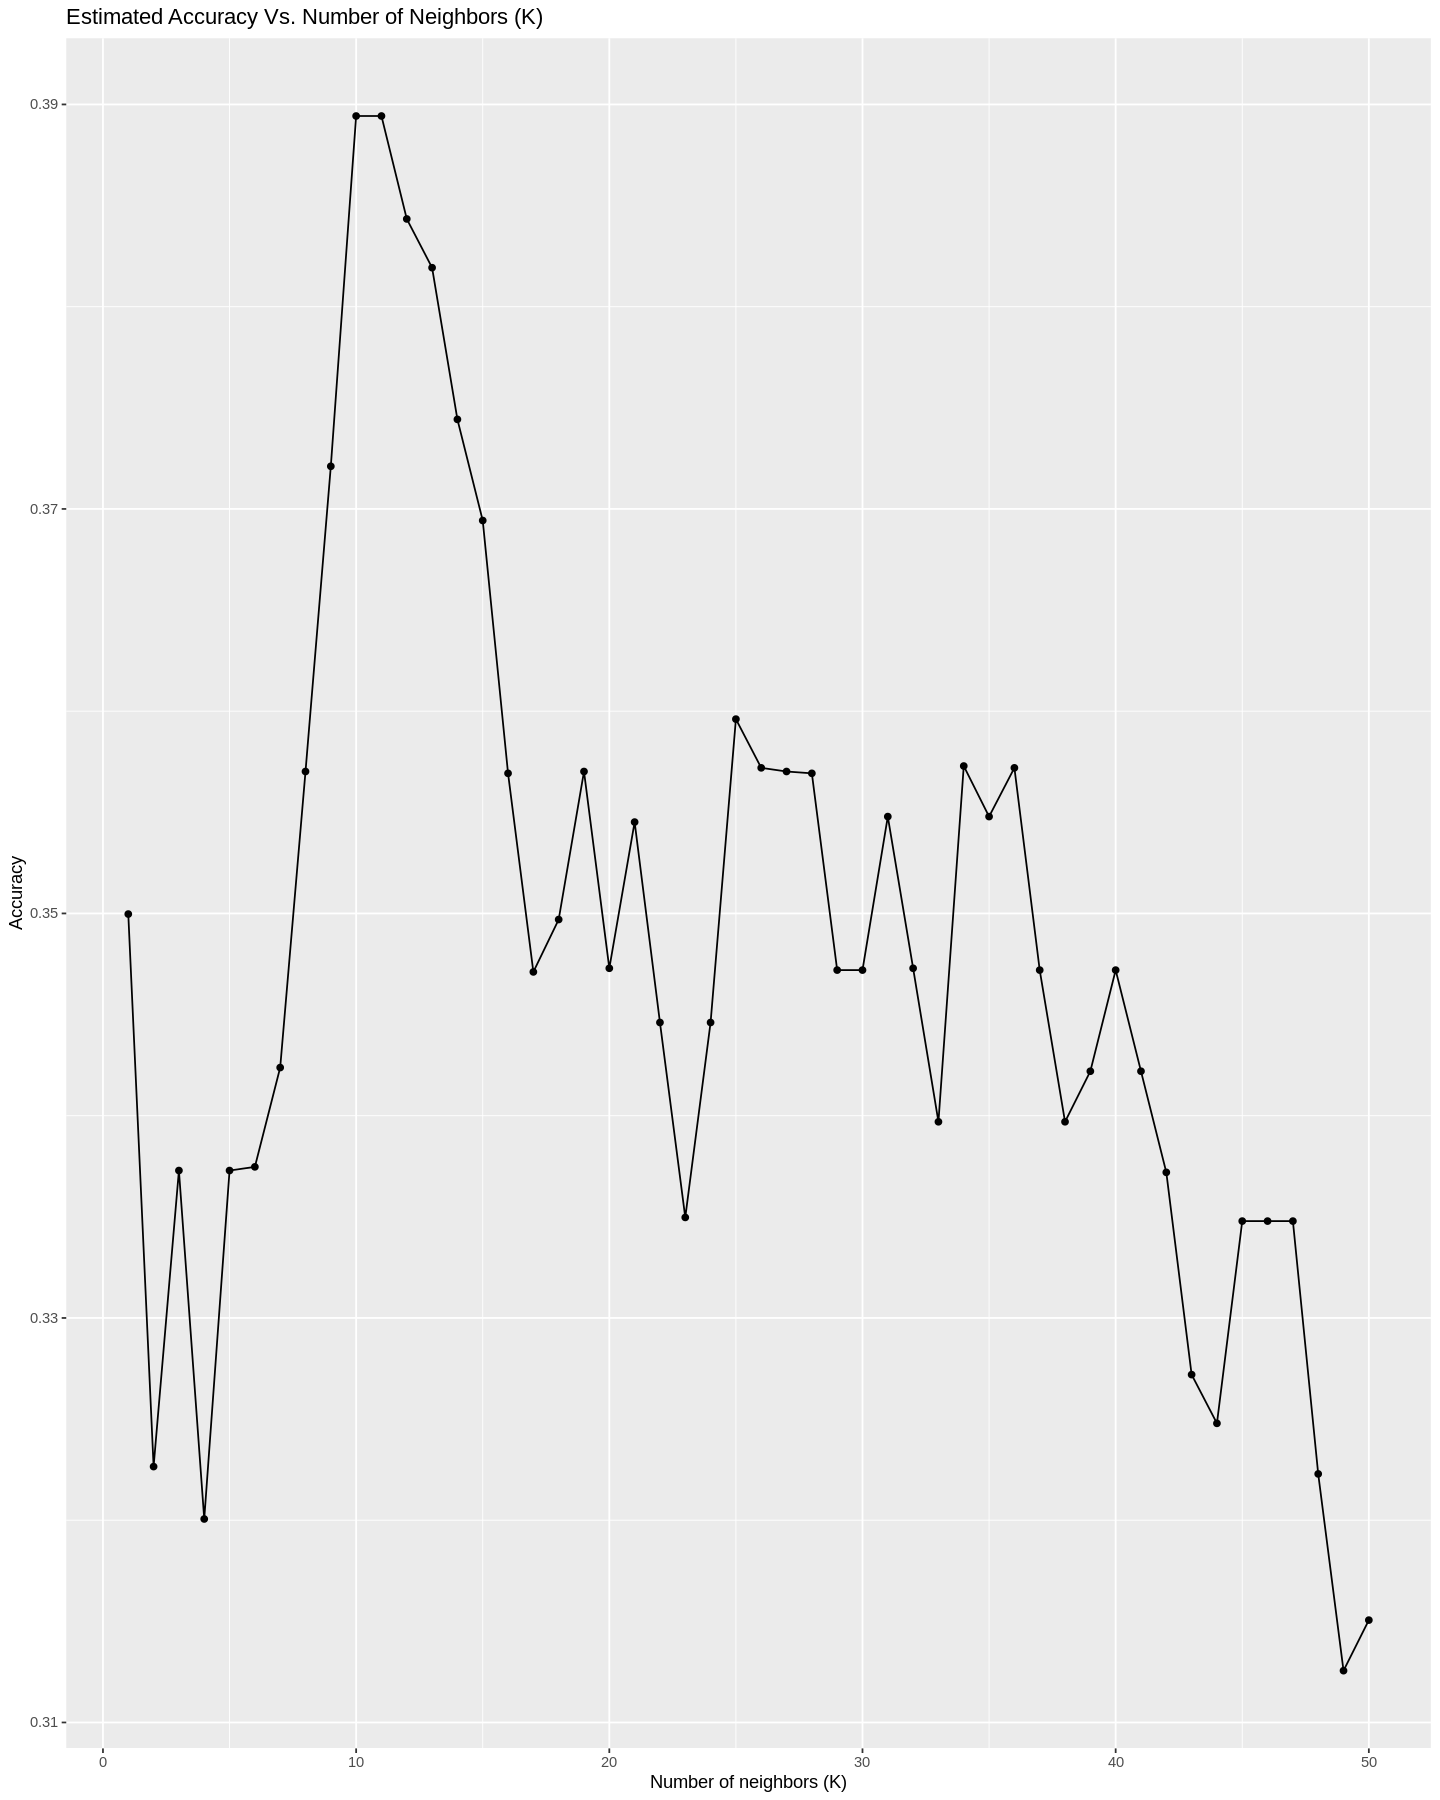

In [10]:
set.seed(1000)
accuracies <- knn_results |>
    filter(.metric == "accuracy")


knn_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of neighbors (K)", y = "Accuracy", title = "Estimated Accuracy Vs. Number of Neighbors (K)")
knn_plot

Figure 2: Esimated accuracy vs. number of neighbors(k) 

From the above graph, it appears that K = 12 might be the best for the model. It has relatively high accuracy (close to 0.4) compared to other values of K. 

We then made a new model specification for the best parameter value (i.e., K = 38), and retrained the entire data set using the fit function. 

In [11]:
set.seed(1000)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
            set_engine("kknn") |>
            set_mode("classification")

data_fit <- workflow() |>
             add_recipe(data_recipe) |>
             add_model(knn_spec) |>
             fit(data = data_train)
data_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.560794
Best kernel: rectangular
Best k: 12

Then we evaluated and reported the estimated accuracy of the classifier based on the testing data. We also evaluated the confusion matrix. 

In [12]:
set.seed(1000)
data_test_predictions <- predict(data_fit, data_test) |>
                          bind_cols(data_test) 

data_prediction_accuracy <- data_test_predictions |>
                        metrics(truth = Reason.for.absence, estimate = .pred_class)
data_prediction_accuracy

data_mat <- data_test_predictions |>
                conf_mat(truth = Reason.for.absence, estimate = .pred_class)
data_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4571429
kap,multiclass,0.3477067


          Truth
Prediction 10 11 13 19 22 23 25 26 27 28
        10  0  0  1  1  2  1  0  1  0  0
        11  0  0  0  0  0  0  0  0  0  0
        13  5  1  6 10  3  0  0  0  0  3
        19  1  0  0  2  1  0  0  2  0  0
        22  0  1  0  2  4  0  1  1  0  1
        23  0  2  3  1  0 31  4  3  7 13
        25  0  1  0  0  1  0  0  0  0  0
        26  1  0  1  1  1  0  0  1  0  0
        27  1  0  1  0  1  6  0  0 20  3
        28  0  0  0  0  0  6  0  0  0 16

Figure 3: Accuracies after classification 

The first table reports the accuracies of the prediction, which is 45.7%. The second table is the confusion matrix. As you can see, it was better at predicting some classes more than others. 

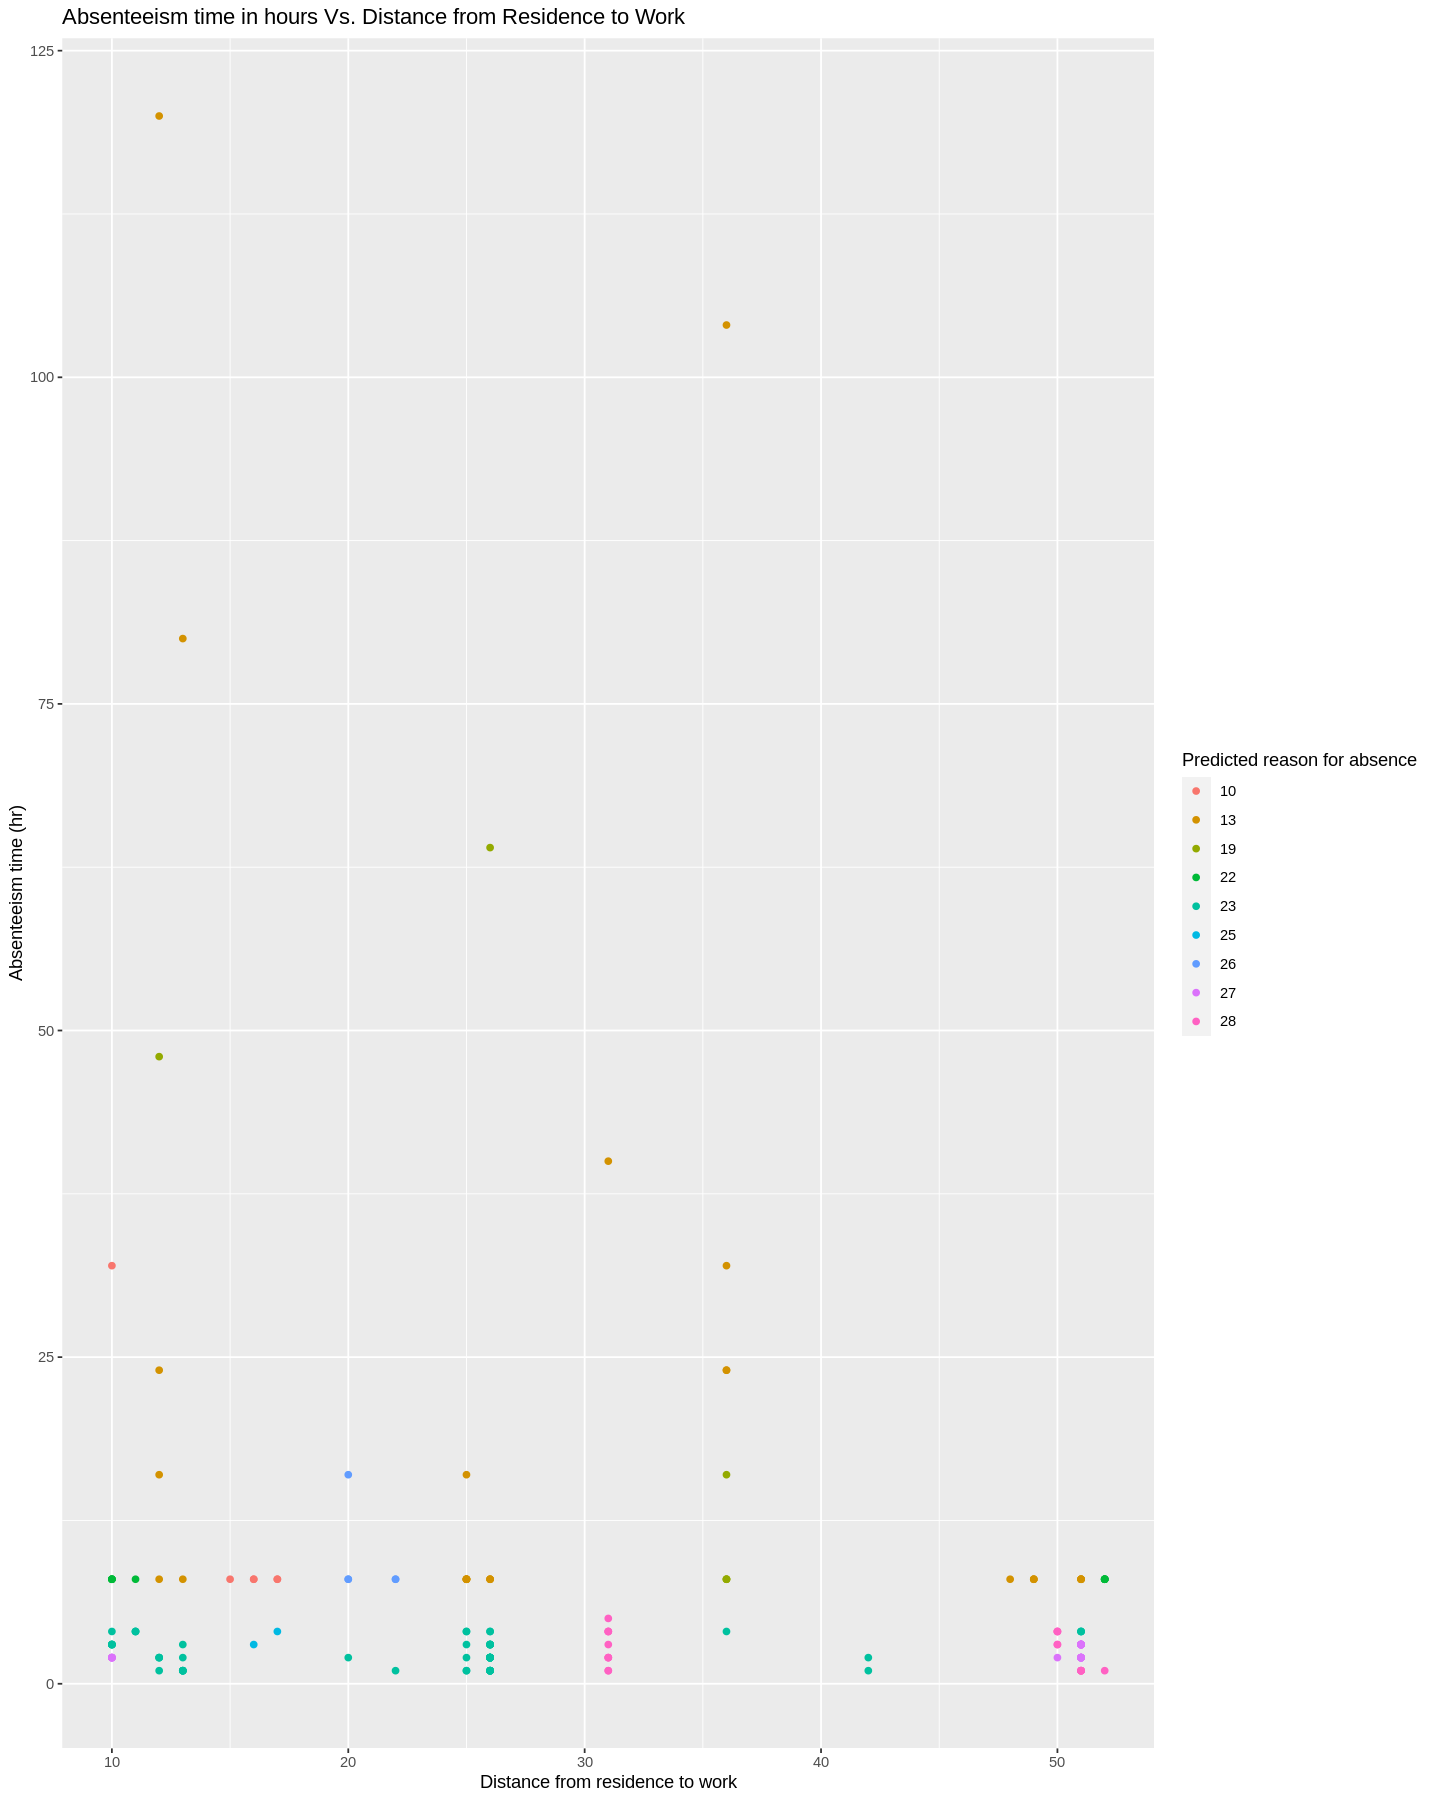

In [13]:
set.seed(1000)
final_vis <- data_test_predictions |>
                ggplot(aes(x = Distance.from.Residence.to.Work,
                           y = Absenteeism.time.in.hours,
                          color = .pred_class)) +
                geom_point() +
                labs(x = "Distance from residence to work", 
                     y = "Absenteeism time (hr)", 
                     title = "Absenteeism time in hours Vs. Distance from Residence to Work",
                    color = "Predicted reason for absence")
final_vis

Figure 4: Visualization of absent hours Vs. distance from work

Figure 4 above presents the predicted reason of absence in different colors. It has 9 colors while we have 10 classes to predict from, meaning one reason is never predicted. This reason is reason 11, diseases in the digestive system. This could be because reason 11 is itself rare, being the 9th most likely reason as presented in table 2. Since the knn model looks for the k nearest neighbors, this class imbalance means ...

Having 9 colors, figure 4 appears messy as it is difficult to differentiate between similar colors like purple and pink at the bottom right corner. Other more advanced visualization methods may help with this issue. 

## Discussion 

We noticed that the top 10 common reasons for absence are mostly medical reasons (i.e injuries, patient consultation, different diseases...). This is true, as respiratory disorders actually account for 50% of absence, and other illnesses account for 30% of absence (Feeny et al., 1998). 

Exploring the 4 potential predictors, the reasons why employees miss their work might differ based on the amount of time absent from work and the distance of their residence to work. This is what we expected to find. It makes sense that people take longer time to recover from injuries and diseases than the time they visit the dentist, so an average of more time would be more likely to miss work for those reasons. What we did not expect is that BMI and age are almost the same for every reason for absence, which shows people with different ages and BMI have similar reasons for absence. Therefore, we couldn’t use them as predictors. We originally thought that people with different ages and different BMIs would have different health problems and different reasons for missing work. We also found the average hours missed for each reason of absence. For example, dentist, doctor, or physiotherapy appointments only make people miss work an average of 2 or 3 hours, while diseases and injuries cause many more hours to be missed. 

Choosing k = 12 gives us the highest estimated accuracy of the classifier, because the accuracy changes very much as we increase or decrease k near 12 . It was estimated that  45.7% accuracy of using distance from residence to work and absent time to predict the reasons for absence when we use k = 12. However the graph looks a bit imbalanced as we ignore step_unsample step. Looking at the confusion matrix, the classifier labelled 80 observations in total correctly. The top 3 reasons for absence that are classified correctly are 31 observations for reason 28 (dental consultation), 20 observations for reason 27(physiotheraphy) and 16 observations for reason 23 (medical consultation). The classifier also made some mistakes. Specifically, it classified 13 observations as medical consultation when they were truly dental consultation, and 10 observations as diseases of musculoskeleton when they were truly injuries and illnesses caused by external causes. The final graph looks a bit messy, and it contains different colors which is hard to differentiate the majority of the reason for absence. 

Such findings could help employers understand the different reasons for their employee's absence at work, assisting them in planning and hiring processes. 

If such a classifier is accurate, one question that could be asked is how and why each predictor is related to the reason for absence. And whether this classifier can be used on a wider population (in Brazil, or in other places of the world).


# Reference 

Bouville, G., Dello Russo, S., & Truxillo, D. (2018). The moderating role of age in the job characteristics–absenteeism relationship: A matter of occupational context? Journal of Occupational and Organizational Psychology, 91(1), 57-83. https://doi.org/10.1111/joop.12188

Ku, B., Phillips, K. E., & Fitzpatrick, J. J. (2019). The relationship of body mass index (BMI) to job performance, absenteeism and risk of eating disorder among hospital-based nurses. Applied Nursing Research, 49, 77-79. https://doi.org/10.1016/j.apnr.2019.05.021

Lim, E., Davis, J., Choi, S. Y., & Chen, J. J. (2019). Effect of sociodemographics, Health‐Related problems, and family structure on chronic absenteeism among children. The Journal of School Health, 89(4), 308-318. https://doi.org/10.1111/josh.12736

Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.

Van Ommeren, J. N., & Gutiérrez-i-Puigarnau, E. (2011). Are workers with a long commute less productive? an empirical analysis of absenteeism. Regional Science and Urban Economics, 41(1), 1-8. https://doi.org/10.1016/j.regsciurbeco.2010.07.005

Zammit, C., Liddicoat, H., Moonsie, I., & Makker, H. (2010). Obesity and respiratory diseases. International journal of general medicine, 3, 335–343. https://doi.org/10.2147/IJGM.S11926

## Appendix

Column definitions for table 1:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases

II Neoplasms

III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism

IV Endocrine, nutritional and metabolic diseases

V Mental and behavioural disorders

VI Diseases of the nervous system

VII Diseases of the eye and adnexa

VIII Diseases of the ear and mastoid process

IX Diseases of the circulatory system

X Diseases of the respiratory system

XI Diseases of the digestive system

XII Diseases of the skin and subcutaneous tissue

XIII Diseases of the musculoskeletal system and connective tissue

XIV Diseases of the genitourinary system

XV Pregnancy, childbirth and the puerperium

XVI Certain conditions originating in the perinatal period

XVII Congenital malformations, deformations and chromosomal abnormalities

XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified

XIX Injury, poisoning and certain other consequences of external causes

XX External causes of morbidity and mortality

XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory 
examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)